In [1]:
import numpy as np
from functools import reduce
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
with open("./data_inputs/day17_input.txt") as f:
    input = f.read()

In [3]:
target_area = [input[15:18], input[27:31], input[20:23], input[33:37]]    # (xmin, ymin, xmax, ymax)
target_area = list(map(int, target_area))

In [4]:
target_area

[150, -129, 171, -70]

In [5]:
# ----- PART 1 -----

def pos_xy(vx0, vy0, its):
    px = [vx0]
    py = [vy0]

    for it in range(its):
        if (px[-1] + (vx0 - (it+1))) > 179 or (py[-1] + (vy0 - (it+1))) < -149:      # 179, -149
            print("break, it:", it)
            break

        px.append(px[-1] + (vx0 - (it+1)) if (vx0 - (it+1)) > 0 else px[-1])
        py.append(py[-1] + (vy0 - (it+1)))

    return list(zip(px, py))


break, it: 23


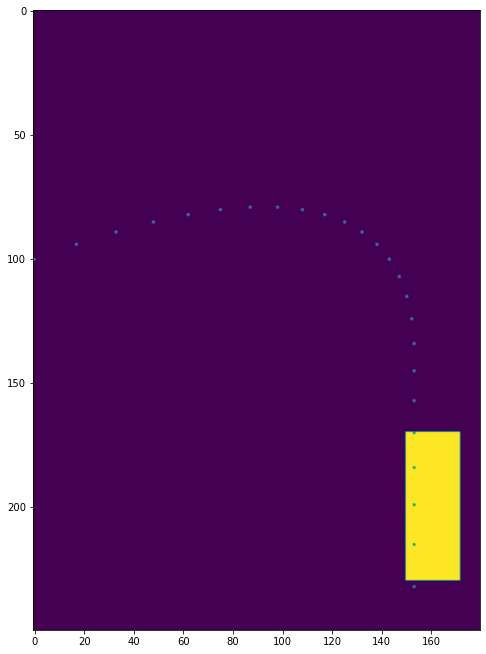

In [10]:
# Visualizations
test_p = pos_xy(17, 6, 600)

ocean = np.zeros((250 , 180))   # (y, x)
ocean[100, 0] = 1               # Start (0, 0)
ocean[abs(target_area[3])+100:abs(target_area[1])+101, target_area[0]:target_area[2]+1] = 2  # Target area

for p in test_p:
    if p[1] < 100:
        ocean[(100-p[1]), p[0]] = 1

plt.imshow(ocean)
plt.rcParams["figure.figsize"] = (8,12)
plt.show()

In [7]:
result1 = reduce(lambda x, y: x + y, range(abs(target_area[1])))

print("Result1:", result1)

Result1: 8256


In [8]:
# ----- PART 2 -----

pxs = np.zeros((155, 260))
for i, vx0 in enumerate(range(17, 172)):
    pxs[i, 0] = vx0
    for it in range(259):
        px = pxs[i, it] + (vx0 - (it+1)) if (vx0 - (it+1)) > 0 else pxs[i, it]
        pxs[i, it+1] = px

pys = np.zeros((258, 260))
for i, vy0 in enumerate(range(-129, 129)):
    pys[i, 0] = vy0
    for it in range(259):
        py = pys[i, it] + (vy0 - (it+1))
        pys[i, it+1] = py



In [9]:
pxs_valid = (150 <= pxs) * (pxs <= 171)
pys_valid = (-129 <= pys) * (pys <= -70)

result2 = np.sum(np.matmul(pxs_valid, pys_valid.T) == True)

print("Result2:", result2)

Result2: 2326
